In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Employee.csv")
print(df)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


In [3]:
df.head(20)  #It display only first 20 rows

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144     True
145    False
146    False
147    False
Length: 148, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()  #It display the mean,std,min,max

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

                                EXTRACT THE CATEGORICAL AND NUMERICAL COLUMN

In [9]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Company', 'Place', 'Country']
Numerical columns : ['Age', 'Salary', 'Gender']


                            TOTAL NUMBER OF UNIQUE VALUES IN CATEGORICAL COLUMN

In [10]:
df[cat_col].nunique()
#df[num_col].nunique()

Company     6
Place      11
Country     1
dtype: int64

In [11]:
df.dtypes    #To find the datatypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

                                DATA CLEANING

In [12]:
df['Age'].replace(0,np.nan)
df['Salary'].replace(0,np.nan)   #To replace the 0 to nan values
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [13]:
df=df.drop_duplicates()  
df                      #To remove the duplicate rows

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [14]:
com_comp=df['Company'].value_counts() #Count The Number Of Company
com_comp


Company
TCS                          52
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [15]:
max=com_comp.idxmax() #Find the maximum value
max

'TCS'

In [17]:
com_place= df['Place'].value_counts().idxmax()
com_place


'Mumbai'

                            Replace The Column Company and place with maximum value

In [18]:
df['Company'].replace(np.nan,'TCS')
df['Company']

0                  TCS
1              Infosys
2                  TCS
3              Infosys
4                  TCS
            ...       
142    Infosys Pvt Lmt
143                TCS
145            Infosys
146                TCS
147            Infosys
Name: Company, Length: 144, dtype: object

In [19]:
df['Place'].replace(np.nan, 'Mumbai')
df['Place']

0       Chennai
1        Mumbai
2      Calcutta
3         Delhi
4        Mumbai
         ...   
142      Mumbai
143    Calcutta
145       Delhi
146      Mumbai
147      Cochin
Name: Place, Length: 144, dtype: object

In [20]:
df['Country'].replace(np.nan,'India')
df['Country']

0      India
1      India
2      India
3      India
4      India
       ...  
142    India
143    India
145    India
146    India
147    India
Name: Country, Length: 144, dtype: object

In [21]:
original_df=df
original_df[['Company','Place','Country']].replace(df[['Company','Place','Country']])

# Update the 'column_to_replace' in the original dataframe with the modified values
df[['Company','Place','Country']]

# Now, 'original_df' contains the modified column
print(original_df)

             Company   Age  Salary     Place Country  Gender
0                TCS  20.0     NaN   Chennai   India       0
1            Infosys  30.0     NaN    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]


In [22]:
original_df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [23]:
Num_col=original_df[['Age','Salary']]
Num_col

,Age,Salary
0,20.0,NaN
1,30.0,NaN
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
142,22.0,8202.0
143,33.0,9024.0
145,44.0,4034.0
146,33.0,5034.0


In [24]:
Num_col.dtypes

Age       float64
Salary    float64
dtype: object

In [25]:
encoder = ce.BinaryEncoder(cols=['Gender'])
original_df = encoder.fit_transform(original_df)
original_df

,Company,Age,Salary,Place,Country,Gender_0,Gender_1
0,TCS,20.0,NaN,Chennai,India,0,1
1,Infosys,30.0,NaN,Mumbai,India,0,1
2,TCS,35.0,2300.0,Calcutta,India,0,1
3,Infosys,40.0,3000.0,Delhi,India,0,1
4,TCS,23.0,4000.0,Mumbai,India,0,1
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1
143,TCS,33.0,9024.0,Calcutta,India,1,0
145,Infosys,44.0,4034.0,Delhi,India,1,0
146,TCS,33.0,5034.0,Mumbai,India,1,0


In [26]:
original_df.rename(columns={'Gender_0': 'Male','Gender_1':'Female'},inplace=True)
original_df.head(20)


,Company,Age,Salary,Place,Country,Male,Female
0,TCS,20.0,NaN,Chennai,India,0,1
1,Infosys,30.0,NaN,Mumbai,India,0,1
2,TCS,35.0,2300.0,Calcutta,India,0,1
3,Infosys,40.0,3000.0,Delhi,India,0,1
4,TCS,23.0,4000.0,Mumbai,India,0,1
5,Infosys,NaN,5000.0,Calcutta,India,0,1
6,TCS,NaN,6000.0,Chennai,India,1,0
7,Infosys,23.0,7000.0,Mumbai,India,1,0
8,TCS,34.0,8000.0,Calcutta,India,1,0
9,CTS,45.0,9000.0,Delhi,India,0,1


In [27]:
original_df.shape

(144, 7)

In [28]:
df=original_df
df

,Company,Age,Salary,Place,Country,Male,Female
0,TCS,20.0,NaN,Chennai,India,0,1
1,Infosys,30.0,NaN,Mumbai,India,0,1
2,TCS,35.0,2300.0,Calcutta,India,0,1
3,Infosys,40.0,3000.0,Delhi,India,0,1
4,TCS,23.0,4000.0,Mumbai,India,0,1
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1
143,TCS,33.0,9024.0,Calcutta,India,1,0
145,Infosys,44.0,4034.0,Delhi,India,1,0
146,TCS,33.0,5034.0,Mumbai,India,1,0


In [29]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Male         int64
Female       int64
dtype: object

                                    FIND THE OUTLIERS IN AGE AND SALARY

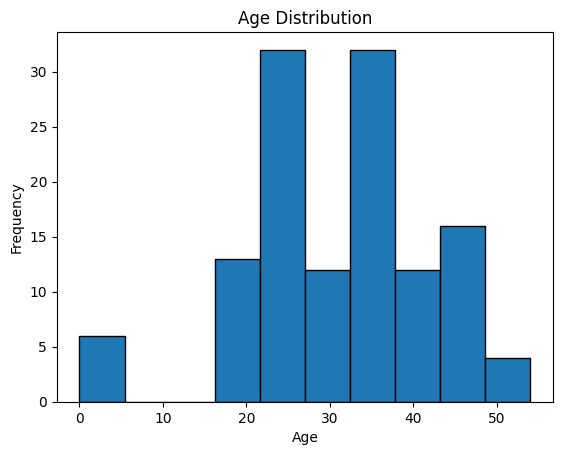

In [30]:
plt.hist(df['Age'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

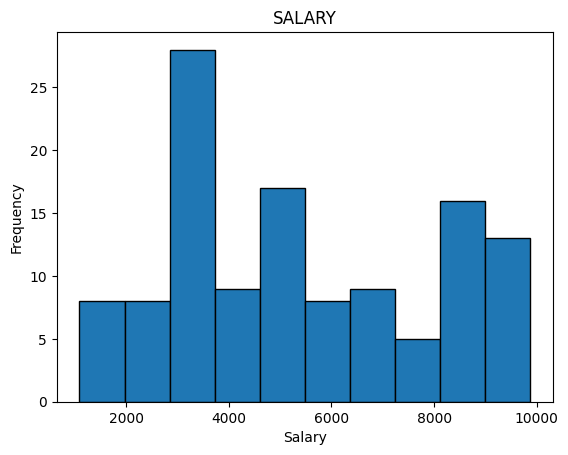

In [31]:
plt.hist(df['Salary'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('SALARY')

# Show the plot
plt.show()

                            PERCENTILE METHOD

In [32]:
q1=df.Age.quantile(0.25)
q1


22.0

In [33]:
q3=df.Age.quantile(0.75)
q3

37.5

In [34]:
IQR=q3-q1
IQR


15.5

In [35]:
lower=q1-1.5*IQR
lower

-1.25

In [36]:
upper=q3+1.5*IQR
upper

60.75

In [37]:
df_without_outlier=df[(df.Age<=-1)&(df.Age>=60)] #There are no outliers
df_without_outlier

,Company,Age,Salary,Place,Country,Male,Female


Here,There is no Outlier

<Axes: xlabel='Age', ylabel='Count'>

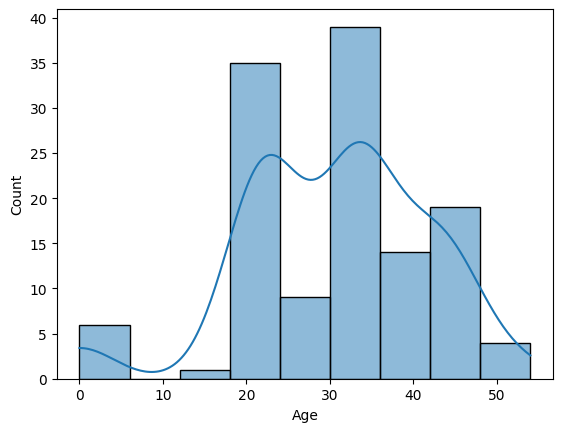

In [38]:
sns.histplot(data=df.Age,x=df.Age,kde=True)

In [39]:
q1=df.Salary.quantile(0.25)
q1

3030.0

In [40]:
q3=df.Salary.quantile(0.75)
q3

8000.0

In [41]:
IQR=q3-q1
IQR

4970.0

In [42]:
lower=q1-1.5*IQR
lower

-4425.0

In [43]:
upper=q3+1.5*IQR
upper

15455.0

In [44]:
df_without_outlier=df[(df.Salary<-4425)&(df.Salary>15455)] # There is no Outlier
df_without_outlier

,Company,Age,Salary,Place,Country,Male,Female


For Salary column also there is no outlier

<Axes: xlabel='Salary', ylabel='Count'>

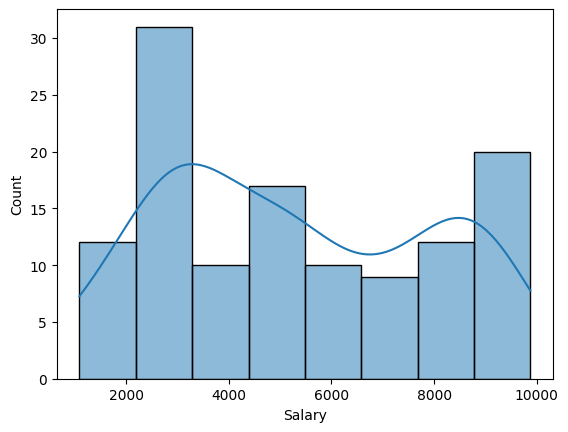

In [45]:
sns.histplot(data=df,x=df.Salary,kde=True)

                    REPLACE THE NULL VALUES FOR THE COLUMN AGE AND SALARY

In [46]:
mean_age = df['Age'].mean()
print("Avg of Age:",mean_age)
mean_salary = df['Salary'].mean()
print("Average of Salary:",mean_salary)




Avg of Age: 30.52755905511811
Average of Salary: 5283.471074380165


                    Replace the Nan Values with mean for the colum Age and Salary

In [47]:
df["Age"].replace(np.nan, mean_age,inplace = True)
df["Salary"].replace(np.nan, mean_salary,inplace = True)
df

,Company,Age,Salary,Place,Country,Male,Female
0,TCS,20.0,5283.471074,Chennai,India,0,1
1,Infosys,30.0,5283.471074,Mumbai,India,0,1
2,TCS,35.0,2300.000000,Calcutta,India,0,1
3,Infosys,40.0,3000.000000,Delhi,India,0,1
4,TCS,23.0,4000.000000,Mumbai,India,0,1
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0,1
143,TCS,33.0,9024.000000,Calcutta,India,1,0
145,Infosys,44.0,4034.000000,Delhi,India,1,0
146,TCS,33.0,5034.000000,Mumbai,India,1,0


In [48]:
df["Age"]=df["Age"].astype(int)
df

,Company,Age,Salary,Place,Country,Male,Female
0,TCS,20,5283.471074,Chennai,India,0,1
1,Infosys,30,5283.471074,Mumbai,India,0,1
2,TCS,35,2300.000000,Calcutta,India,0,1
3,Infosys,40,3000.000000,Delhi,India,0,1
4,TCS,23,4000.000000,Mumbai,India,0,1
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22,8202.000000,Mumbai,India,0,1
143,TCS,33,9024.000000,Calcutta,India,1,0
145,Infosys,44,4034.000000,Delhi,India,1,0
146,TCS,33,5034.000000,Mumbai,India,1,0


                                DATA ANALYSIS

In [49]:

data=df[['Age','Salary']]
corrM=data.corr()
print("Correlation Coefficient")
corrM

Correlation Coefficient


,Age,Salary
Age,1.0000,0.0705
Salary,0.0705,1.0000


<Axes: >

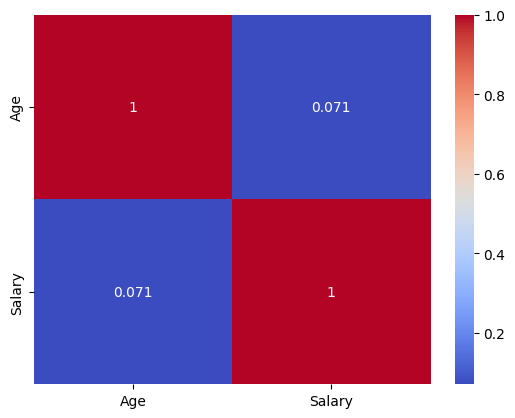

In [50]:
sns.heatmap(corrM, annot=True, cmap="coolwarm")

In [51]:
# Filter the data based on age and salary conditions

filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Print the filtered data
print(filtered_data)

     Company  Age  Salary      Place Country  Male  Female
21   Infosys   50  3184.0      Delhi   India     0       1
32   Infosys   45  4034.0   Calcutta   India     0       1
39   Infosys   41  3000.0     Mumbai   India     0       1
50   Infosys   41  3000.0    Chennai   India     0       1
57   Infosys   51  3184.0  Hyderabad   India     0       1
68   Infosys   43  4034.0     Mumbai   India     0       1
75   Infosys   44  3000.0     Cochin   India     0       1
86   Infosys   41  3000.0      Delhi   India     0       1
93   Infosys   54  3184.0     Mumbai   India     0       1
104  Infosys   44  4034.0      Delhi   India     0       1
122  Infosys   44  3234.0     Mumbai   India     0       1
129  Infosys   50  3184.0   Calcutta   India     0       1
138      CTS   44  3033.0     Cochin   India     0       1
140  Infosys   44  4034.0  Hyderabad   India     0       1
145  Infosys   44  4034.0      Delhi   India     1       0


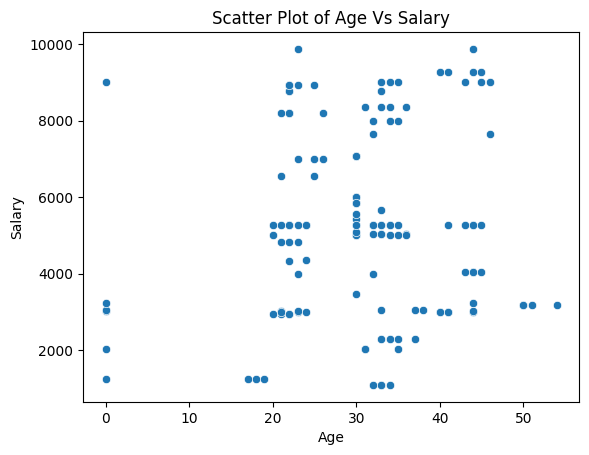

In [52]:
# Create scatter plot
sns.scatterplot(x="Age", y="Salary", data=df)
# Add labels and title
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age Vs Salary")

# Show plot
plt.show()

In [53]:
place_count = pd.DataFrame(df['Place'].value_counts())
place_count.reset_index(inplace=True)
place_count.columns = ['Place', 'Count']
place_count



,Place,Count
0,Mumbai,34
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


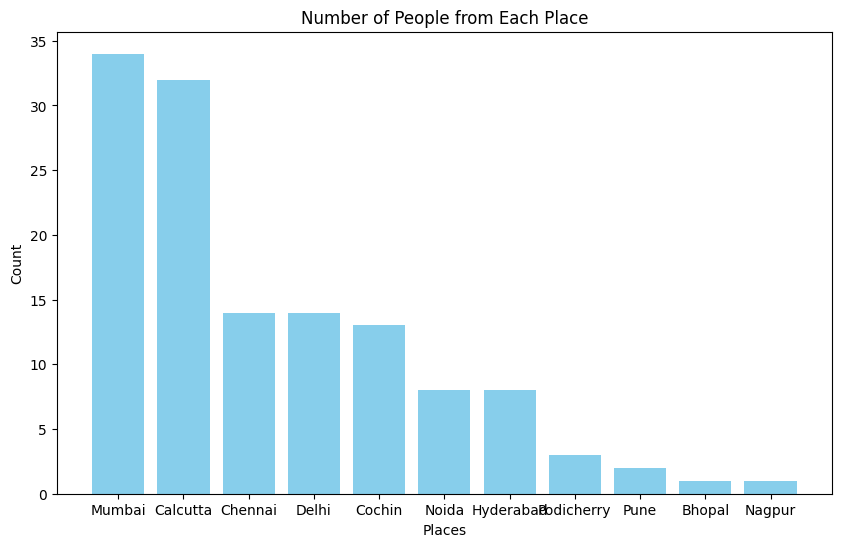

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(place_count['Place'], place_count['Count'],color='skyblue')

# Add labels and title
plt.xlabel('Places')
plt.ylabel('Count')
plt.title('Number of People from Each Place')

# Show the chart
plt.show()

In [55]:
male_series = pd.Series(df['Male'])
male_counts = male_series.value_counts()
print("Male Counts:")
print(male_counts)

Male Counts:
Male
0    112
1     32
Name: count, dtype: int64


Here The male count is 32

In [56]:
female_series = pd.Series(df['Female'])
Female_counts = female_series.value_counts()
print("Female Counts:")
print(Female_counts)

Female Counts:
Female
1    112
0     32
Name: count, dtype: int64


Here,The Female count is 112

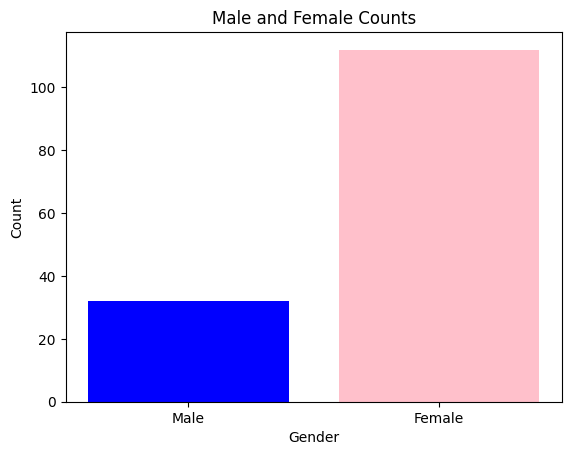

In [57]:
male_counts = 32
female_counts =112

# Data for the bar chart
genders = ['Male', 'Female']
counts = [male_counts, female_counts]

# Create the bar chart
plt.bar(genders, counts, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male and Female Counts')

# Display the chart
plt.show()
 


                                DATA ENCODING

In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
df1=df

In [60]:
label_encoder = LabelEncoder()
df1['Company'] = label_encoder.fit_transform (df1['Company'])
df1['Place']=label_encoder.fit_transform(df1['Place'])
df1['Country']=label_encoder.fit_transform(df1['Country'])



In [61]:
df1.Company.value_counts()


Company
4    52
2    43
0    35
6     8
5     2
1     2
3     2
Name: count, dtype: int64

In [62]:
df1.Place.value_counts()

Place
6     34
1     32
2     14
4     14
11    14
3     13
8      8
5      8
9      3
10     2
0      1
7      1
Name: count, dtype: int64

In [63]:
df1.Country.value_counts()

Country
0    144
Name: count, dtype: int64

In [64]:
df1

,Company,Age,Salary,Place,Country,Male,Female
0,4,20,5283.471074,2,0,0,1
1,2,30,5283.471074,6,0,0,1
2,4,35,2300.000000,1,0,0,1
3,2,40,3000.000000,4,0,0,1
4,4,23,4000.000000,6,0,0,1
...,...,...,...,...,...,...,...
142,3,22,8202.000000,6,0,0,1
143,4,33,9024.000000,1,0,1,0
145,2,44,4034.000000,4,0,1,0
146,4,33,5034.000000,6,0,1,0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = df1[['Company','Place','Age','Country','Male','Female']]
y = df1['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)
 

In [68]:
x_train

,Company,Place,Age,Country,Male,Female
65,0,5,31,0,0,1
126,4,11,20,0,1,0
133,6,2,22,0,0,1
4,4,6,23,0,0,1
115,2,1,22,0,0,1
...,...,...,...,...,...,...
16,2,9,23,0,0,1
128,4,5,33,0,0,1
88,2,1,0,0,0,1
92,4,4,0,0,0,1


In [105]:
x_test

,Company,Place,Age,Country,Male,Female
82,0,10,22,0,0,1
53,4,4,35,0,0,1
127,2,8,30,0,0,1
11,0,1,34,0,0,1
51,6,6,24,0,0,1
12,0,2,45,0,0,1
72,4,1,24,0,0,1
116,4,11,33,0,1,0
8,4,1,34,0,1,0
62,5,11,36,0,1,0


In [69]:
y_train

65     2034.0
126    5009.0
133    8943.0
4      4000.0
115    8787.0
        ...  
16     3030.0
128    3045.0
88     3030.0
92     3045.0
30     7654.0
Name: Salary, Length: 108, dtype: float64

In [70]:
y_test

71     9024.000000
69     5034.000000
0      5283.471074
5      5000.000000
21     3184.000000
17     5000.000000
32     4034.000000
139    2934.000000
85     1234.000000
95     5835.000000
77     5000.000000
40     4345.000000
120    5283.471074
36     5283.471074
90     5283.471074
116    8787.000000
50     3000.000000
15     3000.000000
107    9024.000000
51     3000.000000
102    5283.471074
78     6000.000000
22     4824.000000
1      5283.471074
103    2934.000000
10     5283.471074
138    3033.000000
100    5283.471074
42     6000.000000
43     7000.000000
14     3000.000000
59     5835.000000
121    1234.000000
134    8345.000000
53     5000.000000
75     3000.000000
Name: Salary, dtype: float64

                                    FEATURE SCALING

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:

# Feature scaling for numerical features (excluding "salary")
Stdsc = StandardScaler()
X_train=x_train
X_test=x_test

In [74]:
X_train['Age'] = Stdsc.fit_transform(X_train[['Age']])
X_test['Age'] = Stdsc.transform(X_test[['Age']])


In [75]:
X_train[['Age']]

,Age
65,0.016364
126,-1.063670
133,-0.867300
4,-0.769115
115,-0.867300
...,...
16,-0.769115
128,0.212734
88,-3.027368
92,-3.027368


In [76]:
X_test["Age"]

71     0.310919
69     0.114549
0     -1.063670
5     -0.081821
21     1.881877
17     0.310919
32     1.390953
139   -0.867300
85    -1.358224
95    -0.081821
77    -0.081821
40    -0.670930
120    1.292768
36     0.114549
90    -0.965485
116    0.212734
50     0.998213
15    -0.769115
107   -3.027368
51    -0.670930
102    1.292768
78    -0.081821
22    -0.965485
1     -0.081821
103   -0.867300
10    -0.769115
138    1.292768
100   -0.867300
42    -0.081821
43    -0.572745
14     0.900028
59    -0.081821
121   -3.027368
134    0.016364
53     0.409104
75     1.292768
Name: Age, dtype: float64

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
age_feature = X_train[['Age']]
scaler = MinMaxScaler()
X_train['Age'] = scaler.fit_transform(age_feature)  # Fit and transform the 'Age' feature to scale it between 0 and 1



In [79]:
X_train['Age']

65     0.574074
126    0.370370
133    0.407407
4      0.425926
115    0.407407
         ...   
16     0.425926
128    0.611111
88     0.000000
92     0.000000
30     0.851852
Name: Age, Length: 108, dtype: float64

In [80]:
age_feature = X_test[['Age']]
scaler = MinMaxScaler()
X_test['Age'] = scaler.fit_transform(age_feature)

In [81]:
X_test['Age']

71     0.68
69     0.64
0      0.40
5      0.60
21     1.00
17     0.68
32     0.90
139    0.44
85     0.34
95     0.60
77     0.60
40     0.48
120    0.88
36     0.64
90     0.42
116    0.66
50     0.82
15     0.46
107    0.00
51     0.48
102    0.88
78     0.60
22     0.42
1      0.60
103    0.44
10     0.46
138    0.88
100    0.44
42     0.60
43     0.50
14     0.80
59     0.60
121    0.00
134    0.62
53     0.70
75     0.88
Name: Age, dtype: float64